In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, f1_score


### Dataset

Either download the dataset from Kaggle ([link](https://www.kaggle.com/competitions/titanic/data?select=train.csv)) and use the train.csv or import it with the following line:

In [2]:
!wget -O titanic.csv https://www.dropbox.com/scl/fi/eqqo8uun7lxs0qnzq0por/train.csv?rlkey=lf7t3dnwdfkjyvi2z574xkz5j&dl=0

zsh:1: no matches found: https://www.dropbox.com/scl/fi/eqqo8uun7lxs0qnzq0por/train.csv?rlkey=lf7t3dnwdfkjyvi2z574xkz5j


In [3]:
# Load the Titanic dataset (assuming you have the dataset CSV file)
titanic_df = pd.read_csv('./train.csv')
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Count the percentage of missing values in each column
missing_percentages = titanic_df.isnull().mean() * 100
missing_percentages

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [5]:
# select only the following features and save the new dataset into titanic_df
# [['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
titanic_df_new = titanic_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin", "Embarked"])

titanic_df_new

# drop all nulls
titanic_df_new.dropna(inplace=True)


In [6]:
# Convert categorical variables (e.g., 'Sex') to numerical using one-hot encoding
titanic_df = pd.get_dummies(titanic_df_new, columns=['Sex'], drop_first=True)
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,True
1,1,1,38.0,1,0,71.2833,False
2,1,3,26.0,0,0,7.9250,False
3,1,1,35.0,1,0,53.1000,False
4,0,3,35.0,0,0,8.0500,True
...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,False
886,0,2,27.0,0,0,13.0000,True
887,1,1,19.0,0,0,30.0000,False
889,1,1,26.0,0,0,30.0000,True


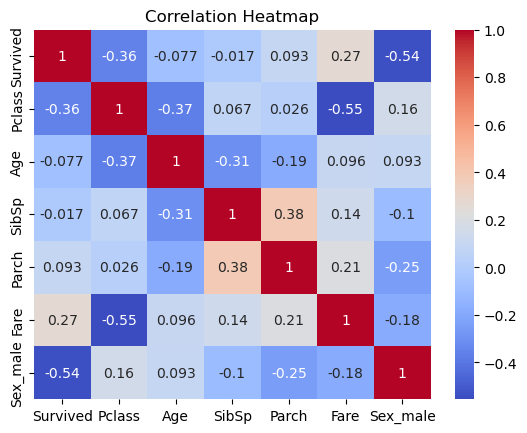

In [7]:
# Visualize the correlation between numerical variables
sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Define 'X' and 'y'
X = titanic_df.drop(columns=['Survived'])  # 'X' contains all features except 'Survived'
y = titanic_df['Survived']  # 'y' contains the 'Survived' column


# Create a train_test_split and use 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [9]:

# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

# Create Logistic Regression Pipeline
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Create SVM Pipeline
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])



# Define parameter grids (Do not change these parameters)
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15]
}

param_grid_lr = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1'],  # Use 'l1' penalty
    'classifier__solver': ['liblinear', 'saga']  # Choose an appropriate solver
}

param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

# Define the scoring metrics you want to use
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

# Create GridSearchCV instances for each algorithm with multiple scoring metrics
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring=scoring, refit='f1_score')
grid_search_lr =  GridSearchCV(lr_pipeline, param_grid_lr, cv=5, scoring=scoring, refit='f1_score')
grid_search_svm =  GridSearchCV(svm_pipeline, param_grid_svm, cv=5, scoring=scoring, refit='f1_score')

# Fit the models using the grid_search
grid_search_rf.fit(X_train, y_train)
grid_search_lr.fit(X_train, y_train)
grid_search_svm.fit(X_train, y_train)

# Get the best parameters based on F1
best_params_rf = grid_search_rf.best_params_
best_params_lr = grid_search_lr.best_params_
best_params_svm = grid_search_svm.best_params_

# Access the results for both scoring metrics
results_rf = grid_search_rf.cv_results_
results_lr = grid_search_lr.cv_results_
results_svm= grid_search_svm.cv_results_

# Print the results for accuracy and F1
print("Random Forest Results:")
print("Accuracy scores:", results_rf['mean_test_accuracy'])
print("F1 scores:", results_rf['mean_test_f1_score'])
print("\nBest Parameters for Random Forest based on F1:", best_params_rf)

print("-------------------------------------------------------------------")

print("\nLogistic Regression Results:")
print("Accuracy scores:", results_lr['mean_test_accuracy'])
print("F1 scores:", results_lr['mean_test_f1_score'])
print("\nBest Parameters for Logistic Regression based on F1:", best_params_lr)

print("-------------------------------------------------------------------")

print("\nSVM Results:")
print("Accuracy scores:", results_svm['mean_test_accuracy'])
print("F1 scores:", results_svm['mean_test_f1_score'])
print("\nBest Parameters for SVM based on F1:", best_params_svm)


Random Forest Results:
Accuracy scores: [0.83716247 0.82315789 0.82666667 0.83366895 0.83016018 0.82842105
 0.82138825 0.82138825 0.82138825]
F1 scores: [0.78591473 0.76741455 0.77256922 0.78808219 0.78379731 0.78094773
 0.77358537 0.77667972 0.77071608]

Best Parameters for Random Forest based on F1: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}
-------------------------------------------------------------------

Logistic Regression Results:
Accuracy scores: [0.79687262 0.798627   0.80739893 0.81089245 0.81264683 0.81440122]
F1 scores: [0.74542357 0.74110637 0.75639261 0.75960233 0.76242365 0.76419145]

Best Parameters for Logistic Regression based on F1: {'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
-------------------------------------------------------------------

SVM Results:
Accuracy scores: [0.79162471 0.8056598  0.79162471 0.81967963 0.79162471 0.83540809]
F1 scores: [0.72962373 0.74354068 0.72962373 0.76344627 0.72962373 0.7

In [10]:

# Assuming you already have 'results_rf', 'results_lr', and 'results_svm' from your code
# Extract the mean test accuracy and test accuracy scores
mean_test_accuracy_rf = results_rf['mean_test_accuracy']
mean_test_accuracy_lr = results_lr['mean_test_accuracy']
mean_test_accuracy_svm = results_svm['mean_test_accuracy']

test_accuracy_rf = grid_search_rf.score(X_test, y_test)
test_accuracy_lr = grid_search_lr.score(X_test, y_test)
test_accuracy_svm = grid_search_svm.score(X_test, y_test)

# Create a dataframe for the heatmap

data = {
    'Algorithm': ['Random Forest', 'Logistic Regression', 'SVM'],
    'Mean Test Accuracy': [mean_test_accuracy_rf, mean_test_accuracy_lr, mean_test_accuracy_svm],
    'Test Accuracy': [test_accuracy_rf, test_accuracy_lr, test_accuracy_svm]
}

pd.DataFrame(data)


,Algorithm,Mean Test Accuracy,Test Accuracy
0,Random Forest,"[0.8371624713958811, 0.8231578947368423, 0.826...",0.745455
1,Logistic Regression,"[0.7968726163234173, 0.7986270022883296, 0.807...",0.666667
2,SVM,"[0.7916247139588101, 0.8056598016781082, 0.791...",0.730435


### Build a function with the code

In [11]:
def evaluate_classifier(name, pipeline, param_grid, scoring, X_train, y_train, X_test, y_test):

    print(f'Model name: {name} \n')
    # Create a GridSearchCV instance for the pipeline
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='f1_score')

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Make predictions on the test set
    test_predictions = grid_search.predict(X_test)

    # Calculate accuracy and F1 score on the test set
    accuracy = accuracy_score(y_test, test_predictions)
    f1 = f1_score(y_test, test_predictions)

    # Print test results
    print("Test Accuracy:", accuracy)
    print("Test F1 Score:", f1)
    print("-----------------------------------")


# Define parameter grids
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15]
}

# Call the function for Random Forest
evaluate_classifier("RF", rf_pipeline, param_grid_rf, scoring, X_train, y_train, X_test, y_test )

# Example usage for Logistic Regression
param_grid_lr = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1'],
    'classifier__solver': ['liblinear', 'saga']
}

# Call the function for Logistic Regression
evaluate_classifier("LR", lr_pipeline, param_grid_lr, scoring, X_train, y_train, X_test, y_test )


# Example usage for SVM
param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

# Call the function for SVM
evaluate_classifier("SVM", svm_pipeline, param_grid_svm, scoring, X_train, y_train, X_test, y_test )


Model name: RF 

Test Accuracy: 0.7832167832167832
Test F1 Score: 0.7155963302752294
-----------------------------------
Model name: LR 

Test Accuracy: 0.7482517482517482
Test F1 Score: 0.6666666666666666
-----------------------------------
Model name: SVM 

Test Accuracy: 0.7832167832167832
Test F1 Score: 0.7304347826086958
-----------------------------------


wandb and tracking the results - (Optional)

In [13]:
import wandb

# Define parameter grids
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15]
}

param_grid_lr = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1'],
    'classifier__solver': ['liblinear', 'saga']
}

param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

# Define the scoring metrics you want to use
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

# Create pipelines for each algorithm with StandardScaler
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

def evaluate_classifier(name, pipeline, param_grid, scoring, X_train, y_train, X_test, y_test):


    # Initialize W&B
    wandb.init(name=name, project='project_ENSF_611')


    # Create a GridSearchCV instance for the pipeline
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='f1_score')

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Log the results to W&B
    wandb.log({'Algorithm': name})
    wandb.log({"Best F1 Score": grid_search.best_score_})
    wandb.log({"Best Parameters": grid_search.best_params_})

    # Make predictions on the test set
    test_predictions = grid_search.predict(X_test)

    # Calculate accuracy and F1 score on the test set
    accuracy = accuracy_score(y_test, test_predictions)
    f1 = f1_score(y_test, test_predictions)

    # Log test results to W&B
    wandb.log({"Test Accuracy": accuracy})
    wandb.log({"Test F1 Score": f1})

    # Print test results
    print("Test Accuracy:", accuracy)
    print("Test F1 Score:", f1)

# Example usage for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15]
}

# Call the function for Random Forest
evaluate_classifier('rf', rf_pipeline, param_grid_rf, scoring, X_train, y_train, X_test, y_test)

# Example usage for Logistic Regression
param_grid_lr = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1'],
    'classifier__solver': ['liblinear', 'saga']
}

# Call the function for Logistic Regression
evaluate_classifier('lr' ,lr_pipeline, param_grid_lr, scoring, X_train, y_train, X_test, y_test)

# Example usage for SVM
param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

# Call the function for SVM
evaluate_classifier('svm', svm_pipeline, param_grid_svm, scoring, X_train, y_train, X_test, y_test)


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /Users/lizhifan/.netrc


Test Accuracy: 0.8041958041958042
Test F1 Score: 0.7407407407407408


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Best F1 Score,▁
Test Accuracy,▁
Test F1 Score,▁
Algorithm,rf
Best F1 Score,0.79251
Test Accuracy,0.8042
Test F1 Score,0.74074


Test Accuracy: 0.7482517482517482
Test F1 Score: 0.6666666666666666


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Best F1 Score,▁
Test Accuracy,▁
Test F1 Score,▁
Algorithm,lr
Best F1 Score,0.76419
Test Accuracy,0.74825
Test F1 Score,0.66667


Test Accuracy: 0.7832167832167832
Test F1 Score: 0.7304347826086958


wandb: Network error (ConnectionError), entering retry loop.
